# GitHub Link
Access these documents and files for to run this notebook:
[clinical-fusion-master](https://github.com/ginnawoo/clinical-fusion-master.git)
- Includes all required files except the MIMIC-III dataset (see About the Data section for obtaining the data).
- After copying the repo, you may proceed to the next section of this notebook.

Please keep in mind that the estimated memory for this project at minimum will require 100 GB. Therefore, the team has provided guidance and steps on processing the data (you're welcome to follow along) and the results are/will be provided for your reference (all produced results will be housed in the GitHub link).

*Original adaptation from Combining structured and unstructured data for predictive models: a deep learning approach ([clinical-fusion](https://github.com/onlyzdd/clinical-fusion)).*



---



# Mount Notebook to Google Drive
Upload the data, GitHub repo, figures, etc to your Google Drive, then mount this notebook to Google Drive. After that, you can access the resources freely.

* Instruction: https://colab.research.google.com/notebooks/io.ipynb

* Example: https://colab.research.google.com/drive/1srw_HFWQ2SMgmWIawucXfusGzrj1_U0q

* Video: https://www.youtube.com/watch?v=zc8g8lGcwQU

Run the code snippet below to mount your Google Drive within Colab:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

You can also use the file browser in the sidebar to browse Drive files.



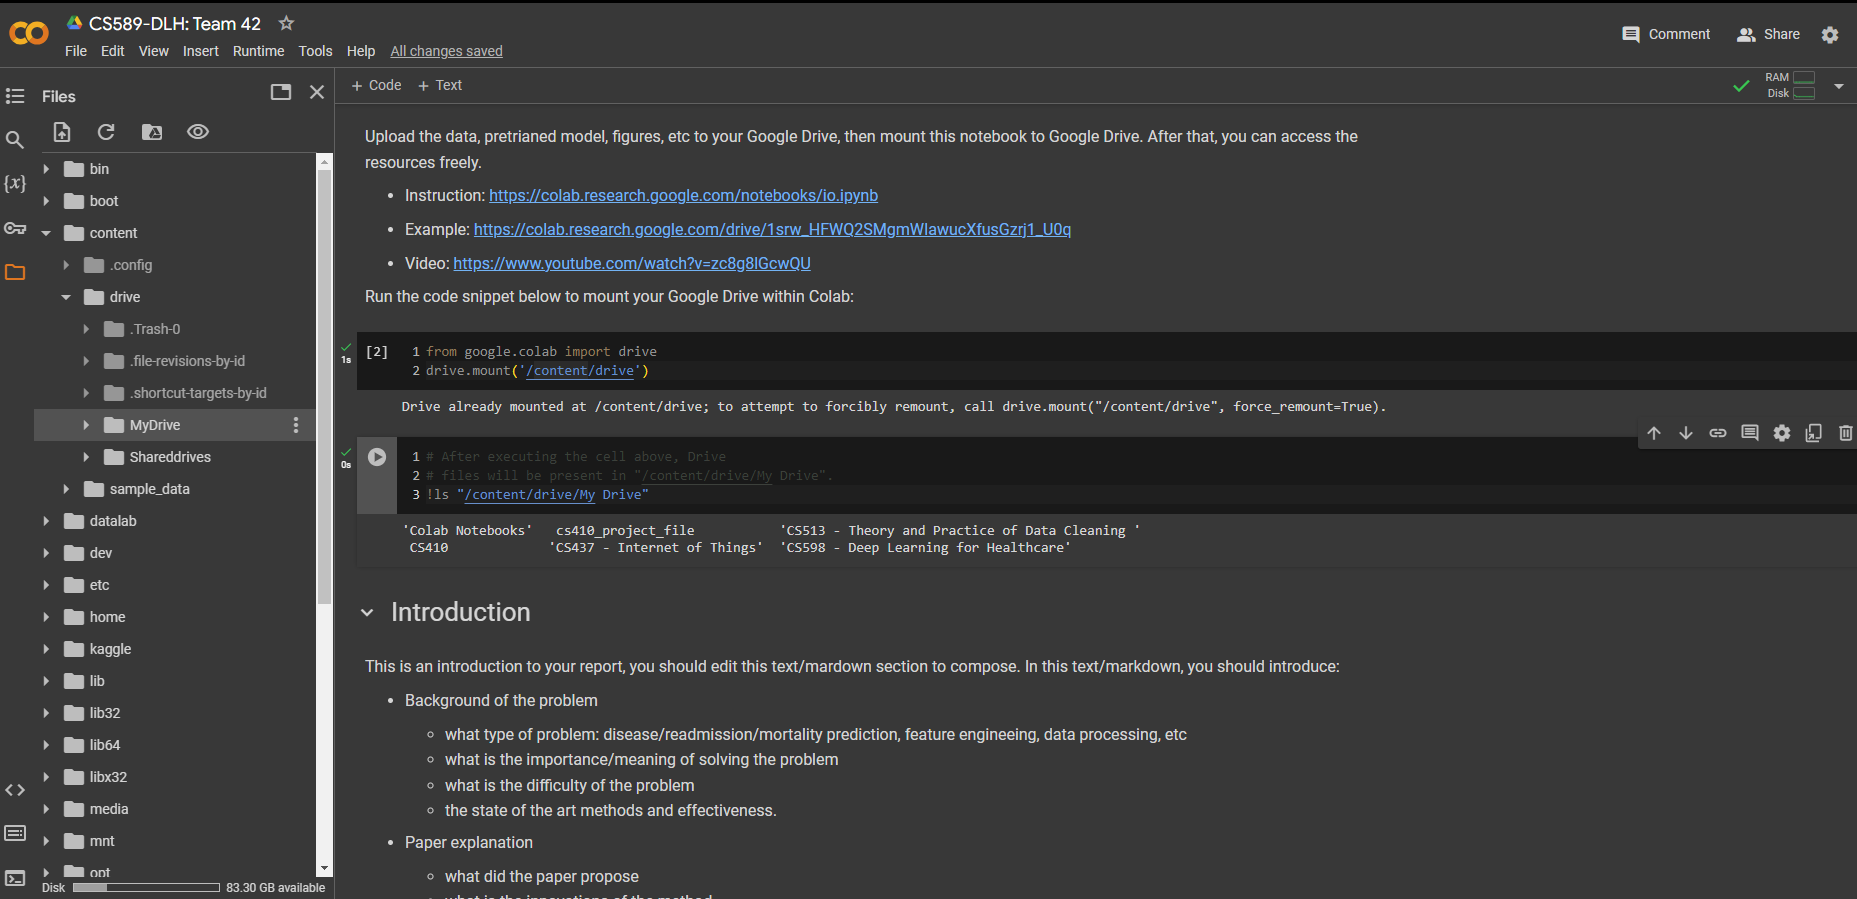

---
# Prerequisites
##Download Repository


Before you begin, make sure you can access the [clinical-fusion-master ](https://github.com/ginnawoo/clinical-fusion-master.git)repository and clone the files to your local machine. Upload the repo to your GDrive under "My Drive":

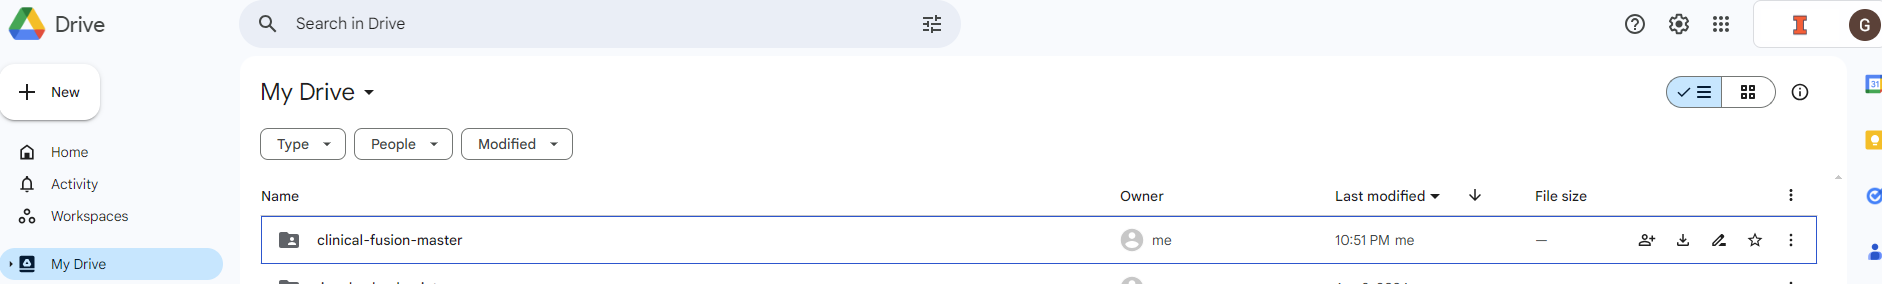

You should be able to access the repository from this Notebook.

##Required Dependencies

Please ensure you have the latest versions of the softwares and libraries to run the code efficiently:

* Python 3.6.10
* Gensim 3.8.0
* [NLTK](https://www.nltk.org/data.html): 3.4.5 (NLTK requires Python versions 3.7, 3.8, 3.9, 3.10 or 3.11.)
* Numpy: 1.14.2
* Pandas: 0.25.3
* Scikit-learn: 0.20.1
* Tqdm: 4.42.1
* PyTorch: 1.4.0
* PostgreSQL ([newest version](https://www.postgresql.org/download/))
* Make ([Chocolatey](https://chocolatey.org/install)) (this is for building the dataset)

Sample commands below to run in your command line or Powershell if you are missing requirements.


In [ ]:
pip install nltk

 If you're using a specific version of Python with the Python Launcher:

In [ ]:
py -3.x -m pip install nltk

---
# Introduction
Healthcare industries have access to vast amounts of data that can be used to improve patient outcomes and care. Specifically, EHRs contain a large amount of patient information in both structured (e.g. patient demographics, vital signs, lab tests) and unstructured (e.g. clinical notes) data format. However, most existing predictive modeling research focuses on using only structured data or unstructured data [1]. While structured data is easily quantifiable and analyzable, unstructured data contains nuanced information that, when properly interpreted, offers a deeper insight into patient conditions and outcomes. The challenge, however, lies in effectively integrating these disparate data types to leverage their full potential in enhancing predictive modeling in healthcare.

In this research, the author seeks to address the development of effective methods to fuse and learn from structured and unstructured EHR data to improve patient representation and risk prediction of important clinical outcomes such as in-hospital mortality, 30-day hospital readmission, and long-length of stay prediction [1]. It proposes two innovative deep learning frameworks, Fusion-CNN (Convolutional Neural Network) and Fusion-LSTM (Long Short-Term Memory), designed to harness the complementary strengths of sequential clinical notes (unstructured data) and temporal signals (structured data). By fusing these data modalities, the proposed models aim to capture a more comprehensive picture of patient health trajectories.


# Scope of Reproducibility:




**Hypothesis 1: Fusion-CNN and Fusion-LSTM outperform traditional machine learning models**

 - Experiments:
  - Implement traditional machine learning model baselines, namely logistic regression (LR) and random forest (RF).
  - Compare the performance of traditional ML baselines with Fusion-CNN and Fusion-LSTM on each prediction task using the evaluation metrics
        - F1 score
        - AUROC
        - AUPRC
    
**Hypothesis 2: Models could improve performance on predictions by combining unstructured text and structured data compared to using either data type alone.**
- Experiments:
    * Use structured data (temporal signal + static information) to train and evaluate Fusion-CNN and Fusion-LSTM model.
    * Use unstructured data to train and evaluate Fusion-CNN and Fusion-LSTM model.
    * Use structured data and unstructured data to train and evaluate Fusion-CNN and Fusion-LSTM model.
    * For each experiment task,  do the following prediction tasks and performance comparison:
        - In-hospital mortality prediction on MIMIC-III
        - Long length of stay prediction on MIMIC-III
        - 30-day readmission prediction on MIMIC-III.
        - Compare the performance of 2 baseline methods (logistic regression, random forest) and Fusion-CNN and Fusion-LSTM when using both data types VS using only structured data or only unstructured data.
    * Evaluation of the models using:
        - F1 score
        - AUROC
        - AUPRC
  ![Comparison_of_model_running_time_with_different_inputs.png](https://drive.google.com/uc?export=view&id=1UaDIoMvdGH_AB2GdtD1Yt6Xp1l0qg07C)





---



# Methodology

The specific approach proposed in this paper is to use two multimodal deep learning architectures, namely Fusion-CNN and Fusion LSTM, to combine structured and unstructured data from EHRs for patient representation learning and predictive modeling:
- **Dataset**: Medical Information Mart for Intensive Care III (MIMIC-III).
- **Data Inputs**: Static information (demographic information, admission-related information), temporal signals (vital signs, lab tests), and sequential clinical notes.
- **Models:**
  - **Fusion-CNN architecture:** the Fusion-CNN framework is adept at combining unstructured textual data with structured temporal and static data. The approach uses a sophisticated pipeline involving several stages:
    - Unstructured Text Processing with Doc2Vec: The model begins by transforming sequential clinical notes into vector representations using Doc2Vec. This unsupervised algorithm learns fixed-length feature representations from variable-length pieces of texts, such as sentences, paragraphs, and documents. By capturing the semantic meaning of words in context, Doc2Vec provides a rich, condensed encoding of the unstructured notes.
    - Convolutional Layers: These vector representations are then processed through convolutional layers. In the context of text, convolutional neural networks (CNNs) apply a series of filters to the embeddings to capture local features – analogous to identifying phrases or concepts that are significant for prediction tasks within clinical notes.
    - Max-Pooling Layers: Following convolution, max-pooling layers are employed to reduce dimensionality and to extract the most salient features from the convolution layer's output. This step enhances the model’s ability to focus on the most important local features that are indicative of the outcome.
    - Flatten and Concatenation: The output from pooling layers is flattened and concatenated with processed structured data to form a comprehensive patient representation. This includes temporal signals such as vital signs and lab results over time, as well as static structured information like age, gender, or specific medical diagnoses.
    - Outcome Prediction: The final patient representation, which now encapsulates a multi-dimensional view of the patient's health state, is passed to the output layers. These layers are responsible for making the final predictions on outcomes such as in-hospital mortality, length of stay, or likelihood of readmission.
 - **Fusion-LSTM architecture**: the Fusion-LSTM framework leverages the power of LSTM networks to handle sequential and time-series data effectively:
   - Unstructured Text Processing with Doc2Vec: Similar to Fusion-CNN, it starts by converting clinical notes into vector representations using Doc2Vec.
   - LSTM Layers: The vectors are then fed into LSTM layers. LSTMs are particularly well-suited for modeling time-series data because of their ability to maintain long-term dependencies. They can remember information for a long period, which is crucial when dealing with temporal patterns in clinical data.
   - Pooling: The LSTM outputs are pooled to condense the information, capturing the most relevant temporal features for the task at hand.
   - Concatenation with Structured Data: The pooled LSTM outputs are combined with the encoded static structured data. This is achieved by encoding the structured data, often through an embedding or encoding layer that transforms static variables into a format that is compatible for fusion with the LSTM outputs.
   - Outcome Prediction: The concatenated representation forms a comprehensive patient profile that is passed to the final prediction layers, generating predictions for the targeted clinical outcomes.
- **Evaluation**: Performance is evaluated and compared against baseline models (logistic regression and random forest), Fusion-CNN and Fusion-LSTM.


##**About the Data**
MIMIC-III is a comprehensive database of deidentified health data from over 40,000 ICU patients at Beth Israel Deaconess Medical Center between 2001-2012. It includes demographics, vital signs, lab tests, medications, and mortality data, supporting a range of studies in epidemiology, clinical decision-making, and tool development. The database integrates data from various sources and is freely available to researchers who complete required training and agree to a data use agreement.

For more detailed information, please refer to the PhysioNet website: MIMIC-III Clinical Database v1.4.

###**Data Description**

MIMIC-III is a relational database consisting of 26 tables. Tables are linked by identifiers which usually have the suffix ‘ID’. For example, SUBJECT_ID refers to a unique patient, HADM_ID refers to a unique admission to the hospital, and ICUSTAY_ID refers to a unique admission to an intensive care unit. <br>

Charted events such as notes, laboratory tests, and fluid balance are stored in a series of ‘events’ tables. For example the OUTPUTEVENTS table contains all measurements related to output for a given patient, while the LABEVENTS table contains laboratory test results for a patient.<br>

Tables prefixed with ‘D_’ are dictionary tables and provide definitions for identifiers. For example, every row of CHARTEVENTS is associated with a single ITEMID which represents the concept measured, but it does not contain the actual name of the measurement. By joining CHARTEVENTS and D_ITEMS on ITEMID, it is possible to identify the concept represented by a given ITEMID.<br>

Developing the MIMIC data model involved balancing simplicity of interpretation against closeness to ground truth. As such, the model is a reflection of underlying data sources, modified over iterations of the MIMIC database in response to user feedback. Care has been taken to avoid making assumptions about the underlying data when carrying out transformations, so MIMIC-III closely represents the raw hospital data.<br>

Broadly speaking, five tables are used to define and track patient stays: ADMISSIONS; PATIENTS; ICUSTAYS; SERVICES; and TRANSFERS. Another five tables are dictionaries for cross-referencing codes against their respective definitions: D_CPT; D_ICD_DIAGNOSES; D_ICD_PROCEDURES; D_ITEMS; and D_LABITEMS. The remaining tables contain data associated with patient care, such as physiological measurements, caregiver observations, and billing information.<br>

In some cases it would be possible to merge tables—for example, the D_ICD_PROCEDURES and CPTEVENTS tables both contain detail relating to procedures and could be combined—but our approach is to keep the tables independent for clarity, since the data sources are significantly different. Rather than combining the tables within MIMIC data model, we suggest researchers develop database views and transforms as appropriate.

###**Instructions to Download Data**:
Total uncompressed size: 6.2 GB.

**Prerequisites**: Prior to requesting access to MIMIC, you must become a credentialed user on PhysioNet AND complete the required training. Instructions for the [credentialing process](https://physionet.org/settings/credentialing/) and the [training](https://physionet.org/about/citi-course/) are provided on PhysioNet.


MIMIC-III is made available via Physionet. Beyond directly downloading the dataset from PhysioNet, there are a few mechanisms for accessing the data:

*   Accessing the data in BigQuery
*   Accessing the data on AWS
*   Accessing the data in a Google Cloud storage bucket

Although Physionet recommends accessing the data via BigQuery, due to budget constraints and space limitation which requires a [minimum 100 GB](https://github.com/MIT-LCP/mimic-code/tree/main/mimic-iii/buildmimic/postgres) of local storage to process the data, the team has opted to access the demo version of the dataset through Google Cloud storage bucket and downloading locally to our machines.

* There are three steps to accessing data on the cloud:

  1. [Link](https://mimic.mit.edu/docs/gettingstarted/cloud/link/) your cloud account to your PhysioNet profile.
  2. Request access to the cloud resource (see second bullet under *Steps to Access Files*).
  3. Log-in to the appropriate service and navigate to the resource.

####**Steps to Access Files**:

- Download the ZIP file (6.2 GB) located [here](https://physionet.org/content/mimiciii/1.4/). Data download is estimated to be around 3 hours. The demo version (13.4 MB) can be found [here](https://physionet.org/content/mimiciii-demo/1.4/) and is significantly faster to download.

- [Request access](https://physionet.org/projects/mimiciii/1.4/request_access/3) to the files using the Google Cloud Storage Browser [here](https://console.cloud.google.com/storage/browser/mimiciii-demo-1.4.physionet.org/). Login with a Google account is required.

   - After gaining access you should see a confirmation notice: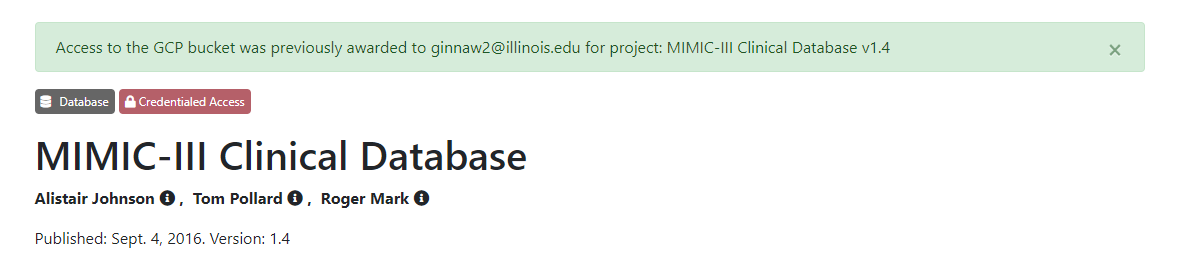

 - Click the link to the Google Cloud Storage and you should see this page:
    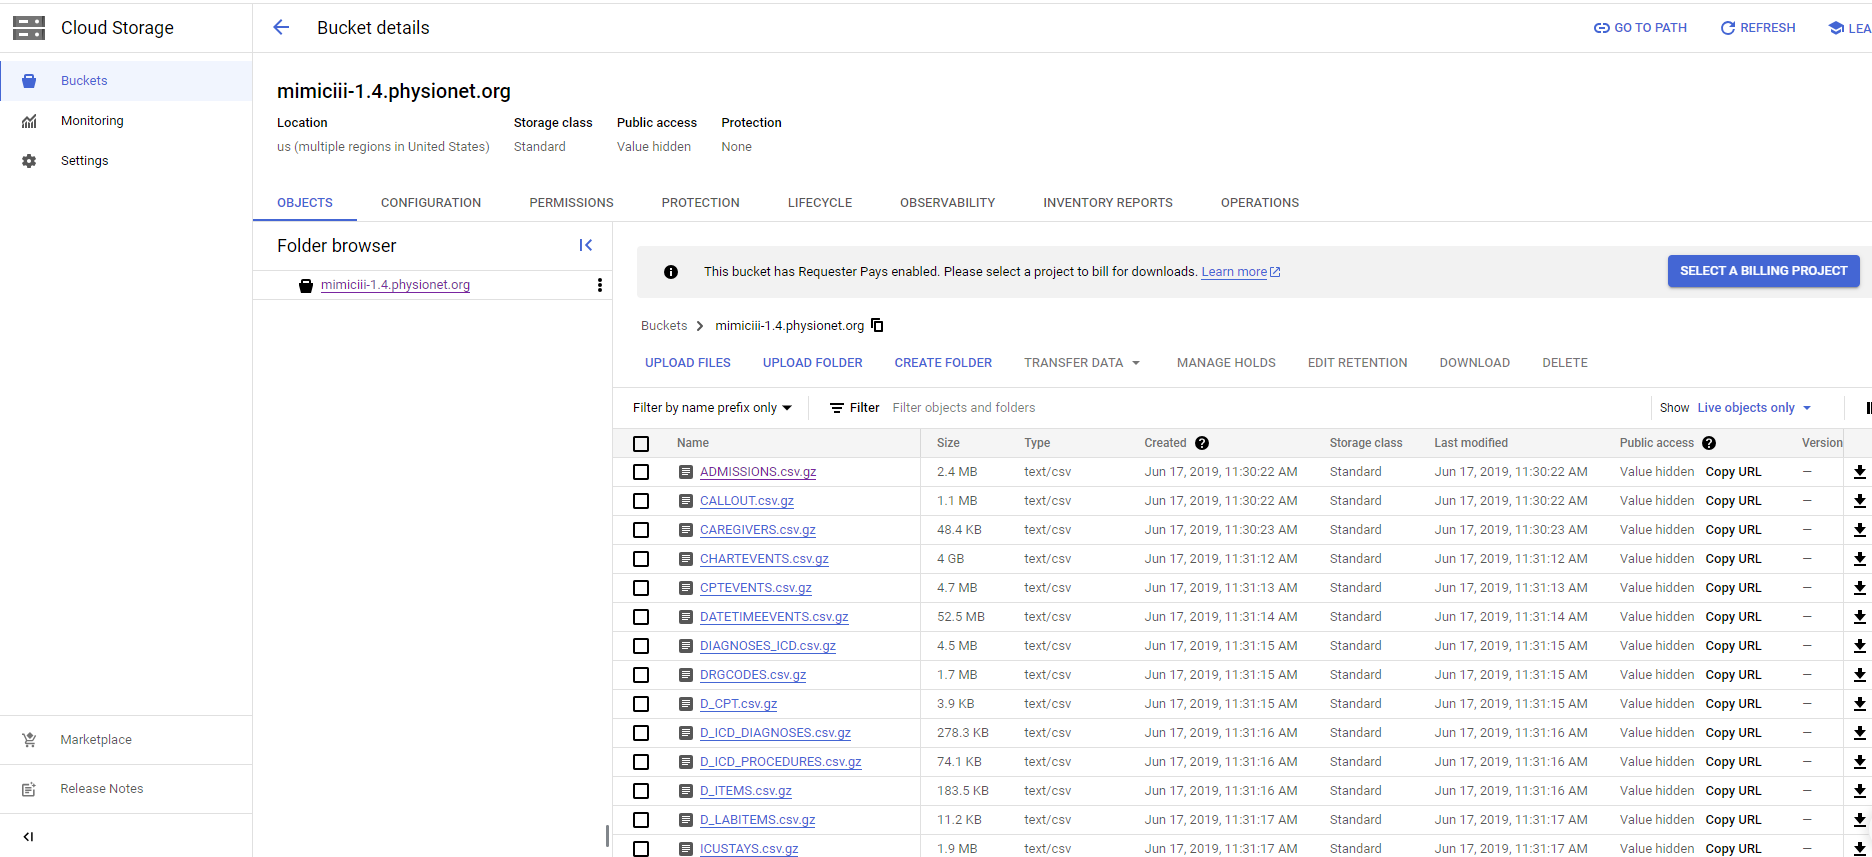

- Access the data using the Google Cloud command line tools (please refer to the gsutil documentation for guidance): ``gsutil -m -u YOUR_PROJECT_ID cp -r gs://mimiciii-demo-1.4.physionet.org DESTINATION``
- Download the files using your terminal: ``wget -r -N -c -np https://physionet.org/files/mimiciii-demo/1.4/``

Congratulations! You've successfully downloaded the dataset! Now, load the dataset to **clinic-fusion-master>data>MIMIC** folder on your Google Drive to access the data from the Notebook.

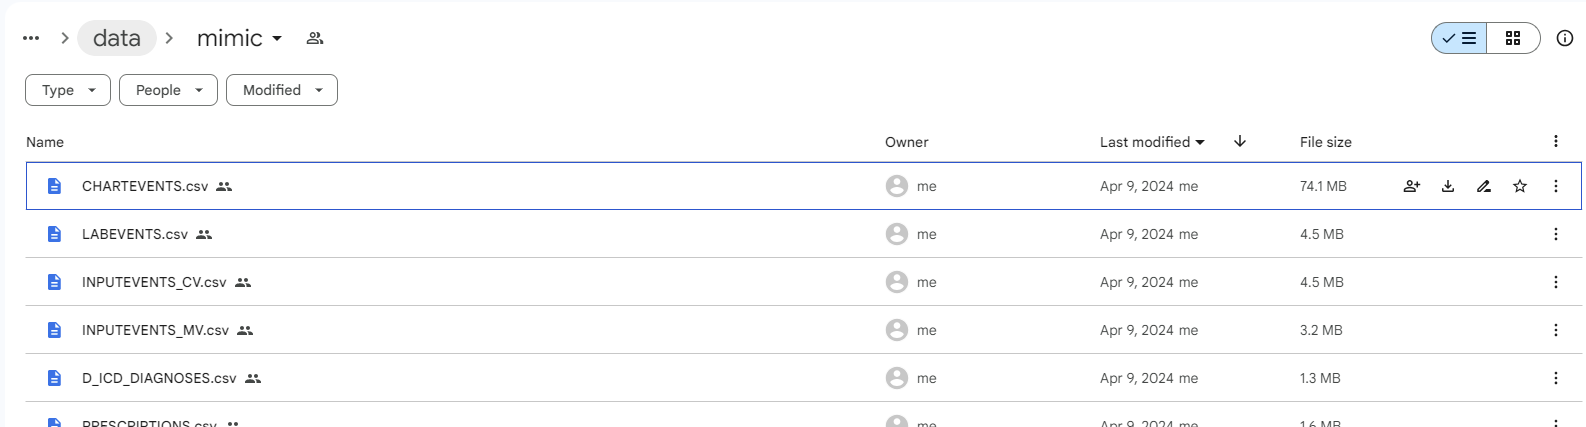



##**Data Processing**

**Prerequisites**:
1. **Understand SQL** before starting with PostgreSQL, as it's important to have a solid understanding of the language since SQL is the foundation for managing and manipulating databases. PostgreSQL is an SQL-based system, and knowing SQL will greatly aid in effectively using PostgreSQL's features. Familiarize yourself with [SQL](https://learnsql.com/blog/learn-advanced-postgresql/)!

2. **Download PostgreSQL** following the [instructions](https://www.postgresql.org/download/) provided. Make sure to download the correct version for your machine.
 * Run the installer file as an administrator. The installer will guide you through several steps. You'll be prompted to choose the install location, the components to install (such as the PostgreSQL Server, pgAdmin, Stack Builder, and command-line tools), and the data directory where your databases will be stored.

    NOTE: *Installation process may take a few minutes*.




###**Preprocessing**

####Optional:
To begin processing the data for Clinical-Fusion, we need to build the MIMIC-III dataset locally using Postgres. You can follow the instructions provided by Physionet [here](https://mimic.mit.edu/docs/iii/tutorials/intro-to-mimic-iii/)  to examine the dataset further prior to building the dataset. The instructions tutorial provides an introduction to the structure and content of the MIMIC-III database. Although it is not necessary to go through the postgre queries in the link, you should make sure you have a good understanding of the MIMIC-III dataset.

####**Step 1: Use PostgreSQL to Build adm_details.csv, pivoted-lab.csv, and pivoted-vital.csv**

Process portion of this code requires you to run each python sequentially in order to process the MIMIC-III dataset and train the model. Before running these files, you will need run the following queries to generate dependencies files.


![Required_Queries.png](https://drive.google.com/uc?export=view&id=1inxPWMmKqbMqaDTZ-YaI2JHFC2ZIan7B)

Launch Postgre to run the adm_details.sql, pivoted-lab.sql, and pivoted-vital.sql. You should see three new cvs files generated in data folder.

![queries_File_Produced.png](https://drive.google.com/uc?export=view&id=1txKrop7tgkNw0okNnhYywLFW5-UywCub)

####**Step 2: Run Python Scripts Below**

Run the files below in sequential order. A series of files will be generated under the "processed" folder. You may need to generate a new folder "imgs" to allow the script to save graphs produced (this is required for 01_get_signals.py).

This step may take some time especially when running *05_preprocess.py*.

In [ ]:
$ python 00_define_cohort.py # define patient cohort and collect labels
$ python 01_get_signals.py # extract temporal signals (vital signs and laboratory tests)
$ python 02_extract_notes.py --firstday # extract first day clinical notes
$ python 03_merge_ids.py # merge admission IDs
$ python 04_statistics.py # run statistics
$ python 05_preprocess.py # run preprocessing
$ python 06_doc2vec.py --phase train # train doc2vec model
$ python 06_doc2vec.py --phase infer # infer doc2vec vectors

#####**Step 3: Build the Model**

Refer to the Model section for understanding and building the model.

##   **Model**
### **Fusion-CNN:**
  * **Model Architecture:**
  The Fusion-CNN model is a deep learning model that combines structured EHR data and unstructured clinical text records to learn a unified patient representation. It contains five main components: static information encoder, temporal signal embedding, sequential notes representation, patient representation, and output layer.
    * Static information encoder: encodes static categorical features as one-hot vectors. The output of the encoder z_static=[z_demo; z_amd] is part of the final patient representation.
    * Temporal signal representation: Fusion-CNN uses a 2-layer CNN and max-pooling to extract deep features from temporal signals.
    * Sequential notes representation: Fusion-CNN uses Doc2Vec to map each clinical note to a vector. The sequence of document vectors is then passed through convolutional layers and max-pooling layers to learn the text representation.
    * Patient representation: the final patient representation z_p=[z_static; z_temporal; z_text] .
    * Output layer: the patient representation is fed into the final output layer and makes predictions.
  * **Training Objective:**
    * Loss function: binary cross entropy loss.
    * Optimizer: Adam optimizer with a learning rate of 0.0001.
  * **Others:**
    * No explicit use of pre-trained models (except for Doc2Vec).
  
  ![Fusion_CNN_framework.png](https://drive.google.com/uc?export=view&id=1tMaWPVWewbjg9oO54DTb4bS-Q0EtT6sW)


  ### **Fusion-LSTM:**
  * **Architecture:**
  The Fusion-LSTM model is another deep learning model that combines structured EHR data and unstructured clinical texts. Similar to Fusion-CNN, it has five main components: static information encoder, temporal signal embedding, sequential notes representation, patient representation, and output layer.
    * Static information encoder: encodes static categorical features as one-hot vectors. The output of the encoder z_static=[z_demo; z_amd] is part of the final patient representation.
    * Temporal signal representation: Fusion-LSTM uses a 2-layer LSTM to extract the representations of temporal signals.
    * Sequential notes representation: Fusion-LSTM starts by mapping clinical notes using Doc2Vec, and then passes the sequence of document vectors through a bidirectional layer (BiLSTM). A max-pooling layer aggregates the hidden states of BiLSTM layer to create the final text representation.
    * Patient representation: same as Fusion-CNN, z_p=[z_static; z_temporal; z_text]
    * Output layer: same as Fusion-CNN.
  * **Training Objective:**
    * Loss function: binary cross entropy loss.
    * Optimizer: Adam optimizer with a learning rate of 0.0001.
  * **Others:**
    * No explicit use of pre-trained models (except for Doc2Vec).

  ![Fusion_LSTM-framework.png](https://drive.google.com/uc?export=view&id=1dduZ_wpgTzdkj8UHQQrdzLIBtNZOaVoi)

##   Training
* Both Fusion-CNN and Fusion-LSTM model implemented using PyTrorch deep learning library.
* Activation function: ReLU.
* Batch Size: 64.
* Max Epoch: 50.

### Baselines
  * Logistic Regression (LR)
  * Randome Forest (RF)

Both of them are implemented using scikit-learn.

In [ ]:
$ python baselines.py --model [model] --task [task] --inputs [inputs]

### Deep Models
  * Fusion-CNN
  * Fusion-LSTM

Both of them are implemented using PyTorch

In [ ]:
!python main.py --model [model] --task [task] --inputs [input] # train Fusion-CNN or Fusion-LSTM
!python main.py --model [model] --task [task] --inputs [input] --phase test --resume # evaluate

## **Evaluation**
* Training: 70% of the data
* Validation: 10% of the data
* Testing: 20% of the data

### **F1 Score**
* F1 score is a machine learning evaluation metric to measure the accuracy of a model. It provides a balanced measure of model performance, taking both false positives and false negatives into account. The F1 score is a useful secondary metric that provides a single number to summarize model performance.
* F1 Score range: 0 ~ 1, where 1 represents perfect precision and recall.
* The F1 score is defined based on the precision and recall scores, which are mathematically defined as follows:
![F1_precision_recall.png](https://drive.google.com/uc?export=view&id=1KmysjL64VDDW1a6L3ZVkhPwNHHc6mndP)
![F1_score.png](https://drive.google.com/uc?export=view&id=10pAtTl-SfK3Ttw3CqTnKUx97EQAJ2uOf)

### **AUROC (area under the receiver operating characteristic)**
* AUROC is a performance metric to evaluate classification models. For binary classification problems, AUROC measures the ability of a model to discriminate between positive cases and negative cases.
* AUROC range: 0 ~ 1, where a higher AUROC value indicates better overall discrimination performance.
    - 0.5 represents a random classifier, the worst case.
    - < 0.7 is sub-optimal performance.
    - 0.7 ~ 0.8 is good performance.
    - < 0.8 indicates excellent performance.
    - 1.0 represents a perfect classifier, the best case.
![ROC Curves.png](https://drive.google.com/uc?export=view&id=1XsEcHEfvrJf7Tw8G3IY7pJsSK7l2WylT)

### **AUPRC (area under the precision-recall curve)**
* AUPRC is another performance metric for binary classification that combines precision (positive predictive value) and recall into a single score. AUPRC is useful for imbalanced datasets where you care more about positive classes. It emphasizes the model's ability to correctly identify positive examples while minimizing false positives.
* AUPRC range: 0 ~ 1, where a higher AUPRC value indicates better performance. Different classes have different AUPRC baselines (unlike AUROC whose baseline is 0.5).


# Results
In this section, you should finish training your model training or loading your trained model. That is a great experiment! You should share the results with others with necessary metrics and figures.

Please test and report results for all experiments that you run with:

*   specific numbers (accuracy, AUC, RMSE, etc)
*   figures (loss shrinkage, outputs from GAN, annotation or label of sample pictures, etc)


In [ ]:
# metrics to evaluate my model

# plot figures to better show the results

# it is better to save the numbers and figures for your presentation.

## Model comparison

In [ ]:
# compare you model with others
# you don't need to re-run all other experiments, instead, you can directly refer the metrics/numbers in the paper

#Issues Encountered
In our attempt to process data using the clinical-fusion and MIMIC-III buildmimic/postgres GitHub repositories, we encountered several challenges that hindered the successful execution of the project.


**Environment Setup Issues**: While the team ensured all necessary software and libraries were installed, which included the correct version of PostgreSQL and Python libraries. Compatibility issues among these dependencies were a significant hurdle due to different machines or required depdendencies for the project dependences causing delays and long troubleshooting hours.
- Example: For some members using a different version of Python generated compatibility issues with the version of the PostgreSQL for this project. This also led to updating required libraries to the correct version (downgrading for some cases as well).

**Poorly Documented Instructions**: Although this can vary across different machines and levels of experience working with this type of model, the Github for the clinical-fusion provided an overly simplified instructions that requires intrepretation on building the dataset. The repo instructed users to process the data leveraging several python files; in actuality, users have to PROCESS the data first by following a separate repo. Although the instructions did mention  under Step 2 to "build the MIMIC-III dataset locally using Postgres," the repo for bulding the dataset was unclear and was up to the team to decipher what the next steps should be.
- Example: Repo should list major dependencies (Make) especially if the dependencies are required for building the dataset.

**Script-Specific Challenges**: The team encountered errors in the SQL scripts, including syntax errors and incorrect data type assumptions, which led to faulty executions. The Python scripts had their own set of issues, including compatibility problems with the version of Python the team was using and other logical errors that prevented proper execution.

**Data Size and Resource Limitations:**
- Hardware Limitations: The large size of the MIMIC-III dataset posed a challenge due to our limited hardware capabilities, particularly with memory and disk space (it was estimated to use up to 100 GB for this project at minimum).
- Timeouts and Overloads: Some scripts ran for an extended period, causing timeouts or system overloads, which made it difficult to proceed without interruptions (i.e., *06_doc2vec.py*)

**Documentation and Misconfiguration**: At times, the documentation did not seem up-to-date, which led to some confusion and incorrect configuration. There were instances where members misfollowed setup instructions or data preparation steps, contributing to the issues encountered which led to more lost of time to complete this draft.

**Trainset data missing**:
The data defined by the authors for doc2vec model training is missing from the input (i.e., *earlynotes.csv*) file.

# Discussions & Next Steps


The process documented in the paper proved to be reproducible up to a certain extent as  the instructions and depdendencies were a bit outdated. The code repository and data were accessible, and the initial steps were clear, enabling the setup of a basic environment. However, the replication was hampered by environmental setup issues that were not fully detailed in the original documentation. A full replication of the results is nearly complete but experienced technical hurdles that the team hope to resolve for the final project.

The replication encountered substantial hurdles predominantly in the technical sphere, specifically the setup of the environment and the management of software dependencies. A major hurdle was compatibility issues across different versions of PostgreSQL and Python, resulting in significant conflicts that the documentation did not foresee. Windows-specific challenges, particularly the execution of make commands, highlighted the assumption of a Unix-like environment by the original authors. Additionally, the Windows-based issues were further compounded by a lack of detailed setup instructions for this operating system, leading to extended debugging sessions.The simplicity of accessing materials and understanding the procedures was counterbalanced by the complexity of executing the setup process. This complexity was exemplified in the handling of environment configuration, software dependencies, and particularly the execution of database setup tasks in Windows—tasks that proved to be nontrivial.

To improve the replicability of this research, several steps are recommended to the authors. A Dockerized environment encapsulating all dependencies would create a more consistent replication environment across different operating systems. Additionally, detailed setup documentation for both Unix and Windows systems, complete with common troubleshooting steps, would provide invaluable guidance to future reproducers. The inclusion of a diagnostic script to verify the correctness of the setup before proceeding would prevent many common issues. The adoption of an automated setup process, through scripts or comprehensive command lists, would reduce the likelihood of human error during manual configuration.

The next steps include a thorough resolution of the current installation and configuration issues. Following this, a complete execution of data processing and model training scripts is necessary to ascertain the reproducibility of the paper’s results. Any discrepancies uncovered will require a meticulous examination to understand the cause of the differences. Contributing fixes and improvements to the original codebase would benefit potentially other students performing a similar walkthrough.

In conclusion, while initial attempts to reproduce the study showed promise, the technical barriers encountered underscore the necessity for improved documentation and environment management in research sharing. Future efforts will not only assess the reproducibility of the paper but also serve as a case study for refining reproducibility practices in computational research. This contribution is hoped to facilitate a more seamless experience for subsequent researchers aiming to validate and build upon the published work.




# References

1.   Zhang, Dongdong, et al. "Combining structured and unstructured data for predictive models: a deep learning approach." BMC medical informatics and decision making 20 (2020): 1-11.
2. F1 Score vs ROC AUC vs Accuracy vs PR AUC: Which Evaluation Metric Should Your Choose? [neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc](https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc)
3. F1 Score in Machine Learning: Intro & Calculation [v7labs.com/blog/f1-score-guide](https://www.v7labs.com/blog/f1-score-guide)
4. Measuring Performance: AUC (AUROC) [glassboxmedicine.com/2019/02/23/measuring-performance-auc-auroc](https://glassboxmedicine.com/2019/02/23/measuring-performance-auc-auroc/#:~:text=AUROC%20tells%20you%20whether%20your,experience%20an%20event%20(ref))
5. Understanding AUC-ROC Curve [towardsdatascience.com](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)
6. Measuring Performance: AUPRC and Average Precision [glassboxmedicine.com](https://glassboxmedicine.com/2019/03/02/measuring-performance-auprc/)
7. The wrong and right way to approximate Area Under Precision-Recall Curve [towardsdatascience.com](https://towardsdatascience.com/the-wrong-and-right-way-to-approximate-area-under-precision-recall-curve-auprc-8fd9ca409064)



# FAQ and Attentions
* Copy and move this template to your Google Drive. Name your notebook by your team ID (upper-left corner). Don't eidt this original file.
* This template covers most questions we want to ask about your reproduction experiment. You don't need to exactly follow the template, however, you should address the questions. Please feel free to customize your report accordingly.
* any report must have run-able codes and necessary annotations (in text and code comments).
* The notebook is like a demo and only uses small-size data (a subset of original data or processed data), the entire runtime of the notebook including data reading, data process, model training, printing, figure plotting, etc,
must be within 8 min, otherwise, you may get penalty on the grade.
  * If the raw dataset is too large to be loaded  you can select a subset of data and pre-process the data, then, upload the subset or processed data to Google Drive and load them in this notebook.
  * If the whole training is too long to run, you can only set the number of training epoch to a small number, e.g., 3, just show that the training is runable.
  * For results model validation, you can train the model outside this notebook in advance, then, load pretrained model and use it for validation (display the figures, print the metrics).
* The post-process is important! For post-process of the results,please use plots/figures. The code to summarize results and plot figures may be tedious, however, it won't be waste of time since these figures can be used for presentation. While plotting in code, the figures should have titles or captions if necessary (e.g., title your figure with "Figure 1. xxxx")
* There is not page limit to your notebook report, you can also use separate notebooks for the report, just make sure your grader can access and run/test them.
* If you use outside resources, please refer them (in any formats). Include the links to the resources if necessary.